In [21]:
import numpy as np
import pandas as pd
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv('fashion-mnist_train.csv')
test_data=pd.read_csv('fashion-mnist_test.csv')

In [3]:
x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

In [4]:
x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [5]:
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

Normalization of Data

In [6]:
x_train=x_train/255.0
x_test=x_test/255.0

In [7]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

Define the Model

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

Compile the Model

In [10]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

Train the Model

In [11]:
history=model.fit(x_train,y_train,batch_size=64,validation_split=0.2,verbose=1,epochs=10)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - accuracy: 0.6173 - loss: 1.0686 - val_accuracy: 0.8316 - val_loss: 0.4608
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 33ms/step - accuracy: 0.8083 - loss: 0.5300 - val_accuracy: 0.8616 - val_loss: 0.3880
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8403 - loss: 0.4495 - val_accuracy: 0.8739 - val_loss: 0.3434
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8569 - loss: 0.3995 - val_accuracy: 0.8867 - val_loss: 0.3178
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.8721 - loss: 0.3621 - val_accuracy: 0.8871 - val_loss: 0.3073
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8833 - loss: 0.3321 - val_accuracy: 0.8958 - val_loss: 0.2901
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8902 - loss: 0.3119 - val_accuracy: 0.9003 - val_loss: 0.2814
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8961 - loss: 0.2939 - 

Evaluate the Model

In [14]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print("Test Accuracy:",test_acc)
print("Test Loss:",test_loss)

313/313 - 2s - 7ms/step - accuracy: 0.9050 - loss: 0.2586
Test Accuracy: 0.9049999713897705
Test Loss: 0.2586071491241455


Make Predictions

In [15]:
predictions=model.predict(x_test)
y_pred=np.argmax(predictions,axis=1)
y_true=np.argmax(y_test,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [19]:
print("Classification Report")
print(classification_report(y_true,y_pred,target_names=[
    'T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']))

Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.90      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.84      0.88      0.86      1000
       Dress       0.90      0.94      0.92      1000
        Coat       0.90      0.81      0.86      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.76      0.68      0.72      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.91      0.90     10000



Confusion Matrix

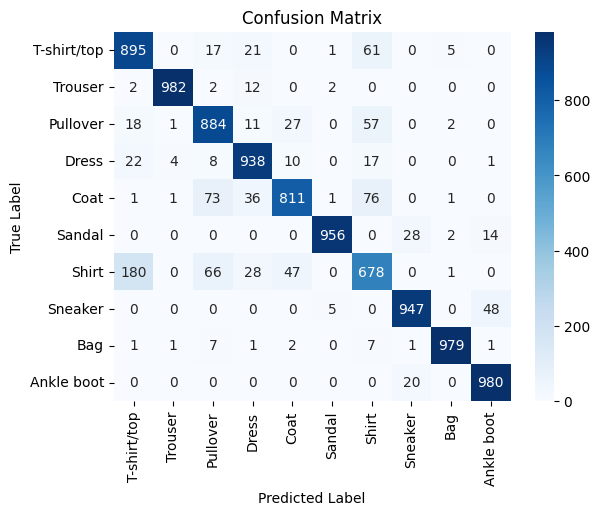

In [25]:
cm=confusion_matrix(y_true,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'],
            yticklabels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Plotting Accuracy and Loss

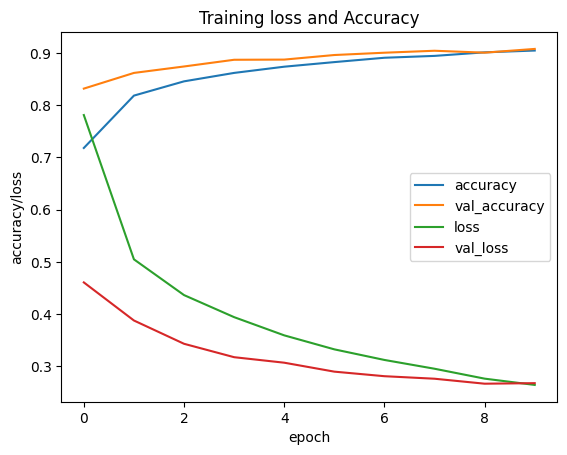

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training loss and Accuracy")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(["accuracy","val_accuracy","loss","val_loss"])
plt.show()

Displaying the Few test Images

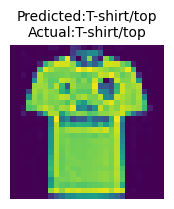

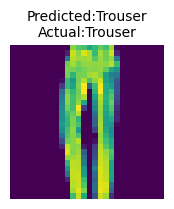

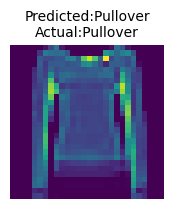

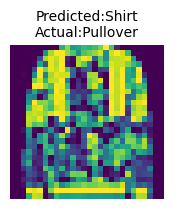

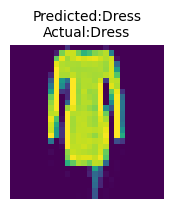

In [32]:
labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
no_of_images=5
for i in range(no_of_images):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i].reshape(28,28))
    plt.axis('off')
    predicted_label=labels[y_pred[i]]
    actual_label=labels[y_true[i]]
    plt.title(f'Predicted:{predicted_label}\nActual:{actual_label}',fontsize=10)
    plt.show()